In [70]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import warnings

In [71]:
warnings.filterwarnings('ignore')

In [72]:
# 混淆矩阵可视化
from turtle import color


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, cm[i, j],
            horizontalalignment='center',
            color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [73]:
# 显示模型评估结果
def show_metrics():
    tp = cm[1, 1]
    fn = cm[1, 0]
    fp = cm[0, 1]
    tn = cm[0, 0]
    print('精确率：{:.3f}'.format(tp/(tp+fp)))
    print('召回率：{:.3f}'.format(tp/(tp+fn)))
    print('F1 值：{:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))))

In [74]:
# 绘制精确率-召回率曲线
def plot_precision_recall():
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.05])
    plt.xlabel('召回率')
    plt.ylabel('精确率')
    plt.title('精确率-召回率曲线')
    plt.show()


In [75]:
# 数据加载
data = pd.read_csv('./creditcard.csv')

In [76]:
# 数据探索
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


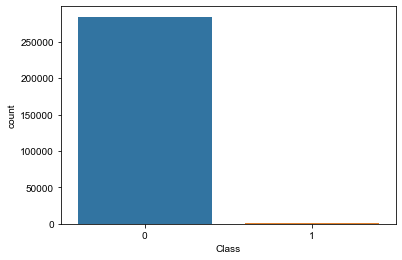

In [77]:
# 设置 plt 正确显示中文
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
# 绘制类别分布
plt.figure()
ax = sns.countplot(x='Class', data=data)
plt.show()

In [78]:
# 显示交易笔数、欺诈交易笔数
num = len(data)
num_fraud = len(data[data['Class']==1])
print('总交易数：', num)
print('诈骗交易笔数：', num_fraud)
print('诈骗交易比例：{:.6f}'.format(num_fraud/num))

总交易数： 284807
诈骗交易笔数： 492
诈骗交易比例：0.001727


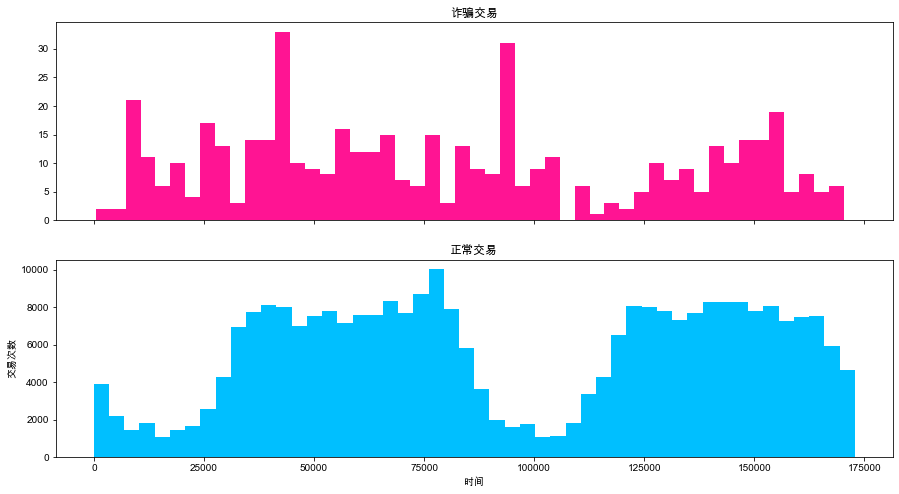

In [79]:
# 欺诈和正常交易可视化
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 8))
bins = 50
ax1.hist(data.Time[data.Class==1], bins=bins, color='deeppink')
ax1.set_title('诈骗交易')
ax2.hist(data.Time[data.Class==0], bins=bins, color='deepskyblue')
ax2.set_title('正常交易')
plt.xlabel('时间')
plt.ylabel('交易次数')
plt.show()

In [80]:
# 对 Amount 进行数据规范化
data['Amount_Norm'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
# 特征选择
y = np.array(data.Class.tolist())
data = data.drop(['Time', 'Amount', 'Class'], axis=1)
X = np.array(data.values)
# 准备训练集和测试集
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=33)

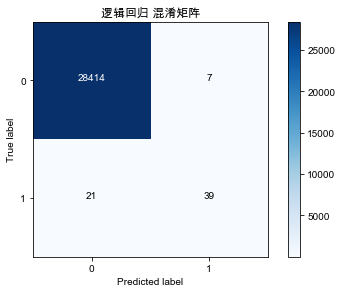

精确率：0.848
召回率：0.650
F1 值：0.736


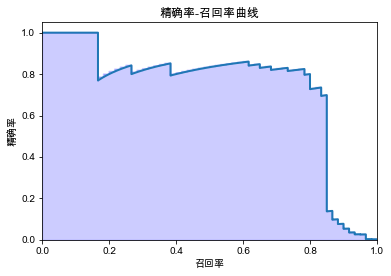

In [81]:
# 逻辑回归分类
clf = LogisticRegression()
clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
# 预测样本的置信分数
score_y = clf.decision_function(test_x)  
# 计算混淆矩阵，并显示
cm = confusion_matrix(test_y, predict_y)
class_names = [0,1]
# 显示混淆矩阵
plot_confusion_matrix(cm, classes = class_names, title = '逻辑回归 混淆矩阵')
# 显示模型评估分数
show_metrics()
# 计算精确确率、召回率、阈值用于可视化
precision, recall, thresholds = precision_recall_curve(test_y, score_y)
plot_precision_recall()